## Clase 1 - Mineria de Datos

# 1. Identificación de Fases en KDD y CRISP-DM

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Crear DataFrame con los datos del ejercicio
datos = {
"Cliente": [1, 2, 3, 4, 5],
"Edad": [25, 40, 32, 22, 35],
"Plan": ["Básico", "Premium", "Estándar", "Básico", "Premium"],
"Consumo_GB": [5, 50, 10, 7, 45],
"Reclamos": [1, 0, 2, 3, 0],
"Estado_Cuenta": ["Pagado", "Pagado", "Moroso", "Moroso", "Pagado"]
}

In [9]:
# Verificar si hay valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Verificar si hay filas duplicadas
print("\nFilas duplicadas:")
print(df.duplicated().sum())

# Verificar si hay edades negativas o poco probables
print("\nClientes con edades menores a 0 o mayores a 100:")
print(df[(df['Edad'] < 0) | (df['Edad'] > 100)])

# Verificar si hay consumos negativos
print("\nClientes con consumo de datos negativo:")
print(df[df['Consumo_GB'] < 0])

# Ver valores únicos en columnas categóricas
print("\nValores únicos en 'Plan' y 'Estado_Cuenta':")
print("Plan:", df['Plan'].unique())
print("Estado_Cuenta:", df['Estado_Cuenta'].unique())

Valores nulos por columna:
Cliente          0
Edad             0
Plan             0
Consumo_GB       0
Reclamos         0
Estado_Cuenta    0
Moroso           0
dtype: int64

Tipos de datos:
Cliente           int64
Edad              int64
Plan             object
Consumo_GB        int64
Reclamos          int64
Estado_Cuenta    object
Moroso            int64
dtype: object

Filas duplicadas:
0

Clientes con edades menores a 0 o mayores a 100:
Empty DataFrame
Columns: [Cliente, Edad, Plan, Consumo_GB, Reclamos, Estado_Cuenta, Moroso]
Index: []

Clientes con consumo de datos negativo:
Empty DataFrame
Columns: [Cliente, Edad, Plan, Consumo_GB, Reclamos, Estado_Cuenta, Moroso]
Index: []

Valores únicos en 'Plan' y 'Estado_Cuenta':
Plan: ['Básico' 'Premium' 'Estándar']
Estado_Cuenta: ['Pagado' 'Moroso']


El proceso KDD (Knowledge Discovery in Databases) consta de varias fases.

*Selección*:
Elegimos las variables relevantes: Edad, Plan, Consumo, Reclamos, Estado de Cuenta.

*Preprocesamiento / Limpieza*:
Revisamos que los datos no tengan errores, estén completos y sean consistentes. Por ejemplo, verificamos que no haya valores faltantes o mal escritos, para este caso no existe errores.

*Transformación*:
Convertimos los datos en un formato adecuado para el análisis, como transformar el texto (“Pagado”/“Moroso”) a valores numéricos (1/0). Convertimos las variables categoricas.

*Minería de datos*:
Para este caso deberiamo aplicar técnicas como clustering, regresión o clasificación para descubrir patrones, por ejemplo:

¿Los clientes con más reclamos y menor consumo tienden a estar morosos?

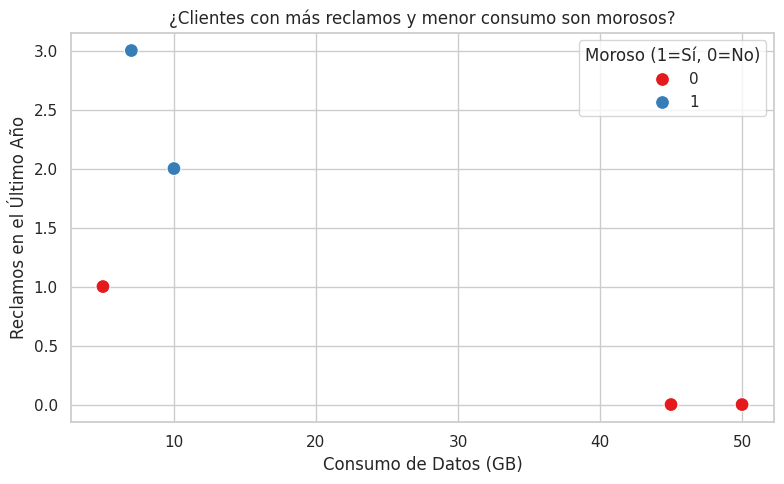

In [6]:
# Crear columna binaria para morosos
df['Moroso'] = df['Estado_Cuenta'].apply(lambda x: 1 if x == 'Moroso' else 0)

# Gráfico
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Consumo_GB', y='Reclamos', hue='Moroso', palette='Set1', s=100)
plt.title('¿Clientes con más reclamos y menor consumo son morosos?')
plt.xlabel('Consumo de Datos (GB)')
plt.ylabel('Reclamos en el Último Año')
plt.legend(title='Moroso (1=Sí, 0=No)')
plt.tight_layout()
plt.show()


Interpretación y evaluación
Analizamos los resultados obtenidos para validar si los patrones descubiertos son útiles para la empresa y se pueden aplicar en decisiones reales.

# 2. Preprocesamiento de Datos

En este caso, no encontré datos faltantes ni errores que deban corregirse, pero sí es necesario hacer algunas transformaciones para preparar los datos correctamente.

Por ejemplo, las variables cargadas como texto, como el Plan contratado y el Estado de cuenta, deben convertirse a un formato numérico para que puedan ser utilizadas en análisis o modelos de aprendizaje automático. En el caso del plan, se podría usar una codificación ordinal si consideramos una jerarquía entre Básico, Estándar y Premium. Para el estado de cuenta, al ser una variable binaria (Pagado o Moroso), se puede transformar fácilmente a 0 y 1.

3. Exploración de Datos

Histograma del consumo de datos (GB) para
analizar la distribución

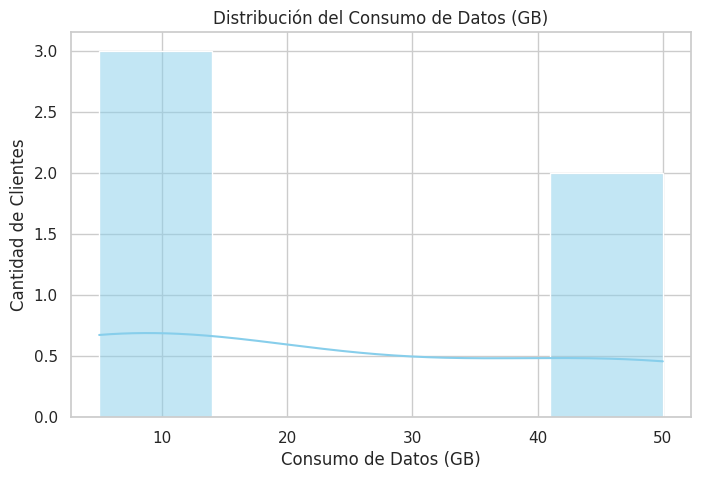

In [7]:
# Histograma del consumo de datos
plt.figure(figsize=(8,5))
sns.histplot(df['Consumo_GB'], bins=5, kde=True, color='skyblue')
plt.title('Distribución del Consumo de Datos (GB)')
plt.xlabel('Consumo de Datos (GB)')
plt.ylabel('Cantidad de Clientes')
plt.grid(True)
plt.show()

<ipython-input-10-839fef278694>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Estado_Cuenta', palette='pastel')


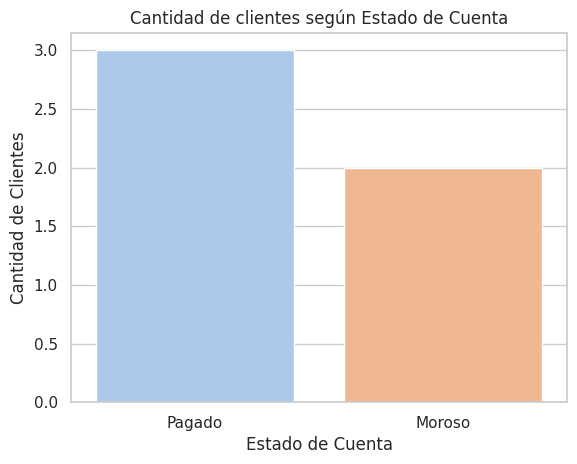

In [10]:
# Gráfico de barras del Estado de Cuenta
sns.countplot(data=df, x='Estado_Cuenta', palette='pastel')
plt.title('Cantidad de clientes según Estado de Cuenta')
plt.xlabel('Estado de Cuenta')
plt.ylabel('Cantidad de Clientes')
plt.show()

4. Interpretación de Resultados
● ¿Qué tendencias observas en los datos?
o ¿Hay alguna relación entre el consumo de datos y el
estado de cuenta?
o ¿Los clientes morosos tienen características en común?

In [11]:
# Filtramos por estado de cuenta
print(df.groupby('Estado_Cuenta')['Consumo_GB'].mean())


Estado_Cuenta
Moroso     8.500000
Pagado    33.333333
Name: Consumo_GB, dtype: float64


Los datos muestran cierta tendencia donde los clientes con mayor consumo de datos (como los clientes 2 y 5) suelen tener sus cuentas al día.

Por otro lado, los clientes morosos (clientes 3 y 4) tienen consumos bajos o moderados (10 GB y 7 GB respectivamente), además de realizar más reclamos.

Sin embargo, esta relación no es absoluta, ya que el cliente 1 también tiene bajo consumo (5 GB) y está al día con su cuenta, lo que indica que otros factores también podrían influir en la morosidad, como el plan contratado, la experiencia general del servicio, u otros factores no incluidos en estos datos.